# 학습 모델 만들기 

## 0. 사용할 패키지 불러오기

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

np.random.seed(3)

## 1. 데이터셋 생성하기
* 원본 데이터를 불러오거나 시뮬레이션을 통해 데이터를 생성합니다.
* 데이터로부터 훈련셋, 검증셋, 시험셋을 생성합니다.
* 이 때 딥러닝 모델의 학습 및 평가를 할 수 있도록 포맷 변환을 합니다.

### 1.1 훈련셋과 시험셋 로딩

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 1.2 데이터셋 전처리

In [3]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

### 1.3 원핫인코딩 (one-hot encoding) 처리

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 1.4 훈련셋과 검증셋 분리

In [5]:
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

## 2. 모델 구성하기
* 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성합니다.
* 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용합니다.

In [6]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정하기
* 학습하기 전에 학습에 대한 설정을 수행합니다.
* 손실 함수 및 최적화 방법을 정의합니다.
* 케라스에서는 compile() 함수를 사용합니다.

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 4. 모델 학습시키기
* 훈련셋을 이용하여 구성한 모델로 학습시킵니다.
* 케라스에서는 fit() 함수를 사용합니다.
### 4.1 배치사이즈
* 몇 개를 처리하고 해답을 맞추는지를 의미함
    * 100 : 100개를 처리하고 해답을 맞춤
    * 1: 1개를 처리하고 해답을 맞춤
* 배치사이즈가 작을수록 갱신이 자주 발생함
### 4.2 에폭
* 같은 데이터셋으로 반복적으로 가중치를 갱신하면서 학습
* 서로 다른 20문제를 1번 푸는 경우보다 같은 1문제를 20번 푸는 경우 정확도가 높다.

In [8]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 18000 samples, validate on 42000 samples
Epoch 1/10
18000/18000 [==============================] - 3s 174us/sample - loss: 1.1262 - accuracy: 0.7234 - val_loss: 0.6417 - val_accuracy: 0.8418
Epoch 2/10
18000/18000 [==============================] - 3s 149us/sample - loss: 0.5091 - accuracy: 0.8707 - val_loss: 0.4685 - val_accuracy: 0.8749
Epoch 3/10
18000/18000 [==============================] - 3s 146us/sample - loss: 0.4091 - accuracy: 0.8895 - val_loss: 0.4090 - val_accuracy: 0.8867
Epoch 4/10
18000/18000 [==============================] - 3s 146us/sample - loss: 0.3656 - accuracy: 0.8982 - val_loss: 0.3786 - val_accuracy: 0.8937
Epoch 5/10
18000/18000 [==============================] - 3s 145us/sample - loss: 0.3390 - accuracy: 0.9049 - val_loss: 0.3586 - val_accuracy: 0.8979
Epoch 6/10
18000/18000 [==============================] - 3s 146us/sample - loss: 0.3199 - accuracy: 0.9101 - val_loss: 0.3431 - val_accuracy: 0.9031
Epoch 7/10
18000/18000 [==========================

## 5. 학습과정 그래프로 확인
* 히스토리 객체 생성
    * 매 에포크 마다의 훈련 손실값 (loss)
    * 매 에포크 마다의 훈련 정확도 (acc)
    * 에포크 마다의 검증 손실값 (val_loss)
    * 에포크 마다의 검증 정확도 (val_acc)

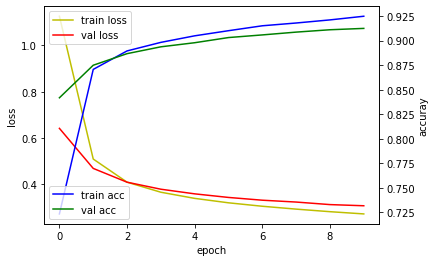

In [9]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## 6. 모델 평가하기
* 준비된 시험셋으로 학습한 모델을 평가합니다.
* 케라스에서는 evaluate() 함수를 사용합니다.

In [10]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 40us/sample - loss: 0.2848 - accuracy: 0.9197

loss_and_metrics : [0.2847642801702023, 0.9197]


## 6-1 모델 저장하기
* 모델에는 다음과 같은 정보가 저장 
    * 나중에 모델을 재구성하기 위한 모델의 구성 정보
    * 모델를 구성하는 각 뉴런들의 가중치
    * 손실함수, 최적하기 등의 학습 설정
    * 재학습을 할 수 있도록 마지막 학습 상태

In [11]:
from tensorflow.keras.models import load_model
model.save('mnist_mlp_model2.h5')

## 7. 모델 사용하기
* 임의의 입력으로 모델의 출력을 얻습니다.
* 케라스에서는 predict() 함수를 사용합니다.

In [12]:
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 6, Predict : 6
True : 6, Predict : 6
True : 7, Predict : 7
True : 5, Predict : 5
True : 0, Predict : 6
